# Titanic

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB

In [208]:
test = pd.read_csv("Data/test.csv")
train = pd.read_csv("Data/train.csv")

In [209]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Priprava podatkov

In [210]:
train = train[np.invert(np.isnan(train["Age"]))]
test["Age"] = test["Age"].fillna(np.mean(xtest["Age"]))
test["Fare"] = test["Fare"].fillna(np.mean(xtest["Fare"]))
#test = test[np.invert(np.isnan(test["Age"]))]
#test = test[np.invert(np.isnan(test["Fare"]))]

Nov atribut minor:

In [211]:
def minors(x):
    minor = []
    for a in x["Age"]:
        if a <= 16:
            minor = np.append(minor, 1)
        else:
            minor = np.append(minor, 0)
    x["Minor"] = minor

In [212]:
minors(train)
minors(test)

/home/matej/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Nova atributa na podlagi priimkov:
* Vsaj en prezivel z istim priimkom
* Vsi umrli z istim priimkom

In [213]:
def allDied(x, y):
    allD = []
    lived = []
    for index, row in x.iterrows():
        surname = row["Name"].split(",")[0]
        dead = 0
        alive = 0
        for index2, row2 in y.iterrows():
            surname2 = row2["Name"].split(",")[0]
            if surname2 == surname:
                if row2["Survived"] == 1:
                    alive += 1
                else:
                    dead += 1
        if dead + alive < 2:
            allD = np.append(allD, 0)
            lived = np.append(lived, 0)
        else:
            if alive == 0:
                allD = np.append(allD, 1)
            else:
                allD = np.append(allD, 0)
            if alive >= 1:
                lived = np.append(lived, 1)
            else:
                lived = np.append(lived, 0)
    x["SurnameAllDied"] = allD
    x["SurnameOneLived"] = lived

In [214]:
allDied(train, train)
allDied(test, train)

In [275]:
train[train["SurnameAllDied"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Minor,SurnameAllDied,SurnameOneLived
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,1.0,1.0,0.0
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,1.0,1.0,0.0
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.0000,NaN,S,0.0,1.0,0.0
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S,1.0,1.0,0.0
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.00,2,0,345764,18.0000,NaN,S,0.0,1.0,0.0
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S,1.0,1.0,0.0
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S,1.0,1.0,0.0
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,1.0,1.0,0.0
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.00,5,2,CA 2144,46.9000,NaN,S,1.0,1.0,0.0
86,87,0,3,"Ford, Mr. William Neal",male,16.00,1,3,W./C. 6608,34.3750,NaN,S,1.0,1.0,0.0


Tabele za napovedovanje:

In [254]:
y = train["Survived"]
x = train[["Pclass", "Age", "SibSp", "Parch", "Fare", "Minor", "SurnameAllDied", "SurnameOneLived"]]

In [255]:
def one_hot(name, x, y):
    category = np.array([])
    for a in y[name]:
        if a not in category:
            category = np.append(category, a)
    category = np.sort(category)
    for c in category:
        current = []
        for a in y[name]:
            if a == c:
                current = np.append(current, 1)
            else:
                current = np.append(current, 0)
        x[c] = current

In [256]:
one_hot("Sex", x, train)
one_hot("Embarked", x, train)
x = x.loc[:, x.columns != 'nan']
#enc = OneHotEncoder()
#enc.fit(train)

/tmp/ipykernel_7795/1030216102.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if a not in category:
/home/matej/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [257]:
xtest = test[["Pclass", "Age", "SibSp", "Parch", "Fare", "Minor", "SurnameAllDied", "SurnameOneLived"]]
one_hot("Sex", xtest, test)
one_hot("Embarked", xtest, test)

/tmp/ipykernel_7795/1030216102.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if a not in category:


In [272]:
xtest

,Pclass,Age,SibSp,Parch,Fare,Minor,SurnameAllDied,SurnameOneLived,female,male,C,Q,S
0,3,34.50000,0,0,7.8292,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,3,47.00000,1,0,7.0000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,62.00000,0,0,9.6875,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3,27.00000,0,0,8.6625,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3,22.00000,1,1,12.2875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
414,1,39.00000,0,0,108.9000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
415,3,38.50000,0,0,7.2500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
416,3,30.27259,0,0,8.0500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Napovedovanje

### Random forest

In [259]:
clf = RandomForestClassifier()
clf.fit(x,y)

RandomForestClassifier()

In [260]:
r = clf.predict(xtest)

In [261]:
resoult = test[["PassengerId"]]

In [262]:
resoult["Survived"] = r

/home/matej/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [263]:
resoult.to_csv("Predictions/rfc2.csv",  index=False)

### Naive Bayes

In [264]:
gnb = GaussianNB()
gnb.fit(x,y)
tt = gnb.predict(xtest)

In [265]:
resoult2 = test[["PassengerId"]]
resoult2["Survived"] = tt

/home/matej/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [266]:
resoult2 == resoult

,PassengerId,Survived
0,True,True
1,True,False
2,True,True
3,True,False
4,True,False
...,...,...
413,True,True
414,True,True
415,True,True
416,True,True


In [267]:
resoult2.to_csv("Predictions/nbc2.csv",  index=False)

## Vizualiation

(array([360.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  93.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

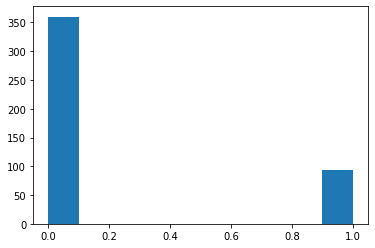

In [268]:
plt.hist(train[train["Sex"] == "male"]["Survived"])

(array([ 64.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 197.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

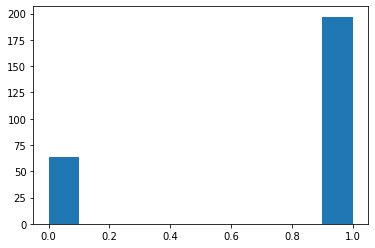

In [269]:
plt.hist(train[train["Sex"] == "female"]["Survived"])

(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

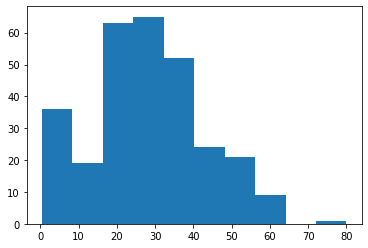

In [270]:
plt.hist(train[train["Survived"] == 1]["Age"])

(array([ 18.,  16.,  99., 110.,  64.,  45.,  38.,  15.,  13.,   6.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <BarContainer object of 10 artists>)

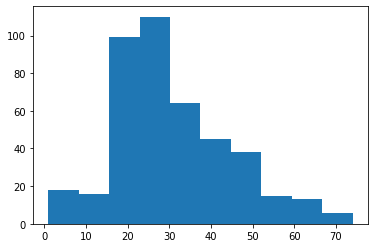

In [271]:
plt.hist(train[train["Survived"] == 0]["Age"])